# Jose Reyes_DPrepHDip_CA1.ipynb, aps_failure_set.csv

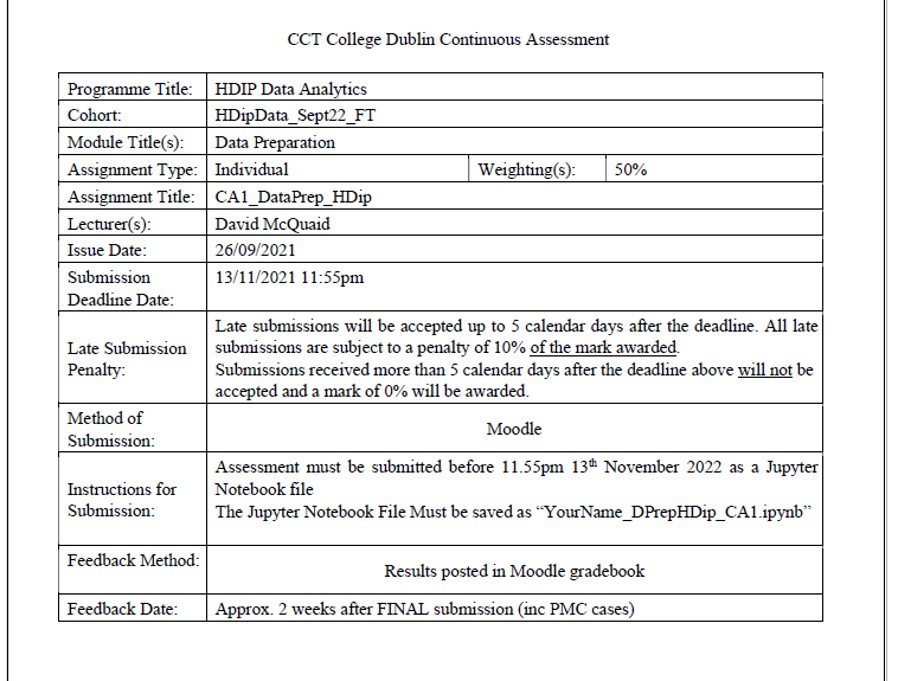

In [1]:
from IPython.display import Image
Image(filename =r'Picture1.jpg')

#                             Introduction

The main goal of this project is to Perform a critical analysis of a data set to optimise the data for a given problem, document the rationale behind the decisions to peers and stakeholders. In order to do so we need perform some Exploratory Data Analysis (EDA) in the dataset, by observing its basic characteristics, applying data preparation method, data cleaning which in this case is extremely important, besides that we will Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Additionally, this document aims to delineate what the Curse of Dimensionality is.

The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes. The datasets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.

## 1- Importing libraries 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics as sts

In order to work with the dataset the following libraries were imported

★ matplotlib: creates charts.
★ pandas: loads tabulated data.
★ scikit-learn: performs machine learning.
★ scipy: contains statistics.
★ seaborn: visualization library.
★ numpy: to perform mathematical operations.
★ Statistics: provides functions for calculating mathematical statistics of numeric data.        

## 2- Loading and observing the Data

In [3]:
df= pd.read_csv("aps_failure_set.csv")

We use head.()method, which by default shows us the first 5 and last 5 observations. You can always modify this by inserting the number of observation you would like to see in the parenthesis. 

In [4]:
df.head(12)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


This data have many missing values. Column *ab_000*  has missing values that Pandas has automatically marked as NaN and we will have to fix that in order to work with this data. The first column *Class* is the dependable variable. This is clearly a Classification Machine Learning problem "In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities" Andreas C. Müller and Sarah Guido(2017)

Using .dtypes() and .info()method we will find out the type of data and how many columns and rows we have

In [5]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

## 3- Exploratory data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


**"Categorical data** is a type of data that can be stored into groups or categories with the aid of names or labels. This grouping is usually made according to the data characteristics and similarities of these characteristics through a method known as matching.
**Numerical data** is a type of data that is expressed in terms of numbers rather than natural language descriptions. Similar to its name, numerical, it can only be collected in number form. Also known as quantitative data, this numerical data type can be used as a form of measurement, such as a person’s height, weight, IQ, etc". (Formplus team, 2022)

This data set has different data types, Object and Int, in other words , categorical and numerical data .This is a huge data set with 60,000 rows and 171 columns

Another way to find out how many columns and rows our data has is by using shape()method, as shown below. 

In [7]:
df.shape

(60000, 171)

We can also explore our data by using **describre.() method**

The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value. 

In [41]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


Min and Max number in many columns have a large range, also mean and median are not the same and we have many cero values. This data has not a normal distribution at all

Lastly, We look into the dependable variable. We can see the value count of this variales by using value_counts() method, it shows the count of each entry. "It returns a Series containing counts of unique values" (The Pandas development team, 2022).

In [9]:
df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

We can also Plot a histogram of the feature "class" this is to display and see in a differnt way that class "neg" is defenitely higher than class "pos", in order words we have much more failures for components not related to the APS than failures related to APS. 
This funtion hist() is used to plot this histogram 

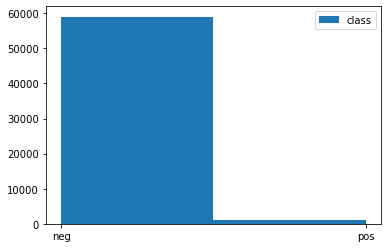

In [10]:
df["class"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", bins = 2);

## 4- Data Cleaning
Data cleaning is a very important process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. Data cleaning involve different techniques based on the problem.

We are going to mark all missing and corrupt values in our data set. Pandas has already mark those values as NaN as we can see in our next table.This was possible because we have previously found those missing values symbols in our data, so this is the list.

We have found some missing value with symbol *"na" or "NaN"* in different columns , lets have a look at "ab_000" Column

In [11]:
df['ab_000'].head(10)

0    na
1    na
2    na
3     0
4    na
5    na
6     0
7    na
8    na
9     0
Name: ab_000, dtype: object

After opening the CSV file I found different missing value formats: "n.a.","NA", "na". . Pandas can read and mark those missing values by using the following method we will see how all missing values have been marked in "ab_000" column.

In [12]:
missing_value_formats = ["n.a.","NA", "na"]
df = pd.read_csv("aps_failure_set.csv", na_values = missing_value_formats)

print(df["ab_000"].head(10))

0    NaN
1    NaN
2    NaN
3    0.0
4    NaN
5    NaN
6    0.0
7    NaN
8    NaN
9    0.0
Name: ab_000, dtype: float64


Now we can check and confirm that our data has missing value that has been already recognized by pandas. We can do that by using *isnull()method and isnull().sum method* our next step will be to replace or fill those missing values.
in the following line you can see the "True" word, this is because our data has missing value.

In [13]:
print(df.isnull().values.any())

True


If we want to see the total of missing value per column, we can do it by using isnull().sum() method. 
As we can see there are some features that have a considerable amount of missing data.

In [14]:
print(df.isnull().sum())

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


Also we can print the total amount of missing values contained in our data by using isnull().sum().sum()Method.
It replace all values in the DataFrame with True for NULL values, otherwise False:

In [15]:
print(df.isnull().sum().sum())

850015


It is important to see which features have more missing data, we can consider removing those if we know that it wont affect our analysis. I will plot a graph to see how those features look like. 
I will use **plt.subplots**, it creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created.

C:\Users\Dell\AppData\Local\Temp\ipykernel_11260\245018961.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


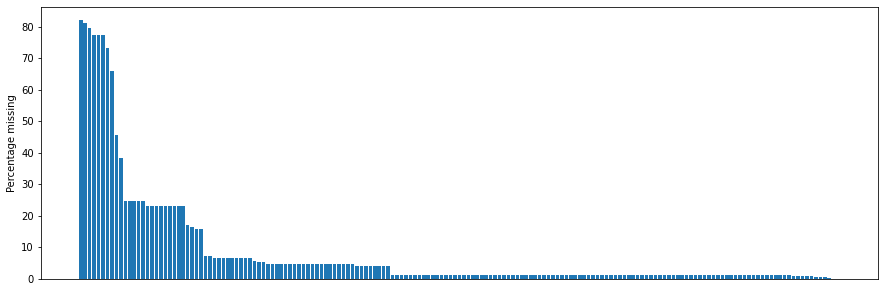

In [16]:
fig, ax = plt.subplots(figsize=(15,5))


missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

The graph above shows that this data cotains a considerable amount of missing data per column. I will remove all those columns with more than 70% missing data. I am doing this because we need to have data that is actually representative for this analysis, and the columns that have more than 70% of missing data are not going to help us much in this process as they dont have enough data to be analysed.

In [17]:
cols_missing = missing[missing[0]>70]
print("There are {} columns with NaNs above 70%.".format(len(cols_missing)))

There are 7 columns with NaNs above 70%.


We realised by the previous result that 7 columns are avobe 70%, now we need to print to see which those columns are.
In order to do so, we will use the following funtion : list(index) The index() method, it returns the index of the given element in the list

In [18]:
cols_to_drop = list(cols_missing.index) 
cols_to_drop.append('class')
cols_to_drop

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'class']

Now that we know the columns name we can drop those columns with significant amount of missing data in our dataset. I have  also dropped "class", which is our dependeable variable, the one we will predict. I did it because we do not need to have that column now since wi will use it later when we train our model.
Using drop.() method. We will drop 8 columns.

In [19]:
df2=df.drop(['br_000','bq_000','bp_000','bo_000','ab_000','cr_000','bn_000','class'], axis=1) 

Now we print our dataset , and we can see that we only have  163 columns, because 8 were dropped. This was part of data cleanning too. My data set has a new name , df2.

In [20]:
df2.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Lets print our total of missing values after dropping the 7 columns with more missing values in our dataset.
previously we had a total of 850015 missing values now we have 521289.

In [21]:
print(df2.isnull().sum().sum())

521289


## 5- Filling missing values
There are multiple ways to fill missing values; we can use "0", Mean, Median, Mode, etc. We need to decide which option to use based on our own analysis.
In order to fill missing values in our dataset we need to analise what is the best option. In this case I will use *skew()* method to see how skewed our data is and determine which measure of central tendency is more represetative. Based on the result we can make a decision.

In [22]:
pd.set_option('display.max_rows', None)
skewness = df2.skew()
print(skewness)

aa_000      6.115752
ac_000      1.784845
ad_000    212.459406
ae_000     90.588252
af_000     51.671770
ag_000    153.387555
ag_001     76.076049
ag_002     37.026222
ag_003     23.787916
ag_004     22.292290
ag_005      9.139143
ag_006      8.272126
ag_007     12.378365
ag_008     35.679656
ag_009     98.288989
ah_000      5.534549
ai_000     47.452651
aj_000     75.075731
ak_000    113.625497
al_000     28.892951
am_0       28.361400
an_000      5.568640
ao_000      5.668929
ap_000      7.807262
aq_000      7.877838
ar_000     27.902212
as_000    111.732428
at_000     57.316795
au_000    108.987809
av_000     47.133583
ax_000     21.808876
ay_000     59.621486
ay_001    102.415758
ay_002     53.640077
ay_003     40.195201
ay_004     63.509322
ay_005     39.041766
ay_006     12.796322
ay_007     21.470725
ay_008      9.657899
ay_009    159.066837
az_000     69.347485
az_001     58.303989
az_002     86.763535
az_003     32.663928
az_004      8.721883
az_005     12.754715
az_006     24

As we can see, the results show that every single feature has a **positive Skewness Which means that the Mean is greater than median, an also that we have many outliers, therefore in this case as we have a Skewed distribution, I will use the Median which is less affected by outliers and more representative in every feature, to replace missing values in our dataset.**

We can use fillna() method and add inplace= true, to keep the same dataset.
"The fillna() method replaces the NULL values with a specified value.
The fillna() method returns a new DataFrame object unless the inplace parameter is set to True, in that case the fillna() method does the replacing in the original DataFrame instead".(w3schools team, 2022)

In [23]:
df2.fillna(df2.median(),inplace=True)
df2.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Nowo data have no missing value, they have been filled with the median.
As shonw below, I have printed the sum of all the missing values per column, we can see they all have 0 as result.

In [24]:
pd.set_option('display.max_rows', 20)
print(df2.isnull().sum())

aa_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 163, dtype: int64


The dataset now is clean and has no missing values. 

In [25]:
print(df2.isnull().sum().sum())

0


## Verify Sparsity

According to "geeksforgeeks.org" (2022) A matrix is a two-dimensional data object having m rows and n columns, therefore a total of m*n values. If most of the values of a matrix are 0 then we say that the matrix is sparse. 
Consider a definition of Sparse where a matrix is considered sparse if the number of 0s is more than half of the elements in the matrix.

In [26]:
sparsity = sum((df2 == 0).astype(int).sum())/df.size
print (sparsity)

0.3287762183235867


Even though this data shows 32% of sparcity , it is not considered as a sparce data, therefore standar scaling or MinMax Scaler can be used, in this data set given that its distribution is not a normal distibution MinMax scaler is best option. 

## 8 Scaling the data

In [27]:
import sklearn.preprocessing as preproc
scaler = preproc.MinMaxScaler()
df2 = scaler.fit_transform(df2)
df_scaled = pd.DataFrame(df2)
df_scaled.values

array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00, 1.46779625e-08, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

Data has been standarized by using MinMaxScaler().
MinMaxScaler "transforms features by scaling each feature to a given range" (Scikit-learn developers, 2022c)
And values are displayed as array.  dataset now is called: df_scaled



### 6- Using PCA to establish the minimum number of components needed for retaining 99.5% variance

"Principal Component Analysis **(PCA)** is one of the most commonly used unsupervised machine learning algorithms across a variety of applications: exploratory data analysis, dimensionality reduction, information compression, data de-noising, and plenty more.
The main aim of PCA is to find the principal components, which can describe the data points with a set of principal components.Select the number of principal components. Select the top N eigenvectors (based on their eigenvalues) to become the N principal components. The optimal number of principal components is both subjective and problem-dependent. Usually, we look at the cumulative amount of shared variance explained by the combination of principal components and pick that number of components, which still significantly explains the shared variance". (Keboola team 2022)

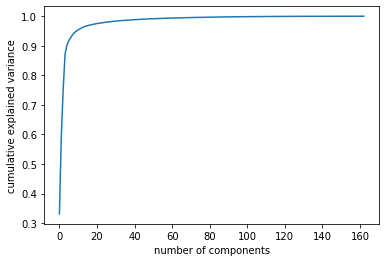

In [28]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance'); 

According to the graph above we only need few components, probably 72, to keep almost 100% of the variance in the data.
But we have been required to keep 95.5 of variance , so we need to communicate this request to our PCA by inserting 0.995.in parenthesis.

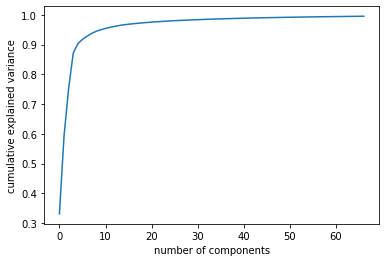

In [29]:
pca = PCA(0.995).fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We now get this different graph which shows that in order to keep 99.5% of variance in our data we need around 60 components.
We still dont know the exact number , so we need to print that number by using the following funtion. 

In [30]:
projected = pca.fit_transform(df_scaled)
projected.shape

(60000, 67)

According to the results, 67 components are needed. to keep 95.5% of variance in our data.
We can now rename those three columns. See the chart below. A new dataset was created , this is called df_pca. This dataset contains 60000 rows and only 67 columns which are the compoments we got by performing PCA.

In [31]:
df_pca = pd.DataFrame(projected, columns = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11","C12","C13","C14","C15","C16","C17","C18","C19","C20","C21","C22","C23","C24","C25","C26","C27","C28","C29","C30","C31","C32","C33","C34","C35","C36","C37","C38","C39","C40","C41","C42","C43","C44","C45","C46","C47","C48","C49","C50","C51","C52","C53","C54","C55","C56","C57","C58","C59","C60","C61","C62","C63","C64","C65","C66","C67"])
display(df_pca)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67
0,0.359662,0.760463,0.251289,0.113332,-0.053075,0.039038,0.001407,-0.057444,-0.022377,0.021039,...,0.001024,0.002970,0.002737,-0.006222,0.006794,-0.009568,0.000521,0.004172,-0.008847,-0.003131
1,0.155003,-0.177171,0.072974,-0.160375,0.678080,0.096612,0.032294,0.048526,-0.019287,0.006040,...,0.002420,-0.001393,0.004143,-0.000237,-0.001521,0.002552,0.002346,0.000515,0.004443,-0.001257
2,-0.205207,-0.096947,-0.170539,-0.012029,0.005191,-0.044273,-0.001507,-0.009214,0.002854,-0.008586,...,0.001514,-0.002293,0.001445,0.000846,-0.001065,0.002756,0.001717,-0.000902,0.000367,-0.000691
3,-0.468780,-0.074570,-0.103839,-0.038320,-0.002445,-0.007815,0.003273,0.008843,-0.001542,0.004217,...,-0.000506,0.000425,-0.003727,0.003390,-0.004126,0.001296,0.001058,0.016128,-0.002016,-0.000092
4,0.271960,-0.190142,-0.019975,-0.054556,-0.017685,0.058812,-0.008881,-0.023674,-0.009887,0.014400,...,-0.001723,-0.000675,-0.001546,0.001134,0.001282,0.005361,0.001687,-0.001379,-0.006064,-0.001341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.857457,-0.258915,-0.083353,0.006570,-0.006046,0.059007,0.017774,-0.063839,-0.030657,-0.016119,...,-0.010036,-0.003008,-0.012369,-0.007674,0.010368,-0.001943,0.001292,0.000155,-0.005158,-0.000798
59996,-0.196431,0.871739,0.113955,0.024212,-0.012519,-0.011766,0.003291,0.018534,0.001831,0.000633,...,-0.001487,0.000482,0.000351,-0.000386,-0.000993,0.001095,-0.000368,-0.000724,0.000437,0.000285
59997,-0.315801,0.885684,0.113683,0.045608,-0.014717,-0.014480,0.002836,0.017445,0.001085,0.004554,...,-0.000631,-0.000035,0.000904,-0.000657,-0.000627,0.001221,0.000009,-0.000504,0.000614,-0.000028
59998,-0.251654,0.835612,0.233288,0.226789,-0.026080,-0.007929,0.010260,-0.072908,-0.037683,0.014852,...,0.005768,0.014829,-0.015409,0.001511,-0.003295,-0.026196,-0.013822,-0.001025,-0.003320,-0.006803


The feature Class will be added back to our dataset so we can work with it.We can apply one machine learning model. There are different models that work with classification problems.

In [32]:
df_pca["class"] = df["class"]
display(df_pca)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C59,C60,C61,C62,C63,C64,C65,C66,C67,class
0,0.359662,0.760463,0.251289,0.113332,-0.053075,0.039038,0.001407,-0.057444,-0.022377,0.021039,...,0.002970,0.002737,-0.006222,0.006794,-0.009568,0.000521,0.004172,-0.008847,-0.003131,neg
1,0.155003,-0.177171,0.072974,-0.160375,0.678080,0.096612,0.032294,0.048526,-0.019287,0.006040,...,-0.001393,0.004143,-0.000237,-0.001521,0.002552,0.002346,0.000515,0.004443,-0.001257,neg
2,-0.205207,-0.096947,-0.170539,-0.012029,0.005191,-0.044273,-0.001507,-0.009214,0.002854,-0.008586,...,-0.002293,0.001445,0.000846,-0.001065,0.002756,0.001717,-0.000902,0.000367,-0.000691,neg
3,-0.468780,-0.074570,-0.103839,-0.038320,-0.002445,-0.007815,0.003273,0.008843,-0.001542,0.004217,...,0.000425,-0.003727,0.003390,-0.004126,0.001296,0.001058,0.016128,-0.002016,-0.000092,neg
4,0.271960,-0.190142,-0.019975,-0.054556,-0.017685,0.058812,-0.008881,-0.023674,-0.009887,0.014400,...,-0.000675,-0.001546,0.001134,0.001282,0.005361,0.001687,-0.001379,-0.006064,-0.001341,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.857457,-0.258915,-0.083353,0.006570,-0.006046,0.059007,0.017774,-0.063839,-0.030657,-0.016119,...,-0.003008,-0.012369,-0.007674,0.010368,-0.001943,0.001292,0.000155,-0.005158,-0.000798,neg
59996,-0.196431,0.871739,0.113955,0.024212,-0.012519,-0.011766,0.003291,0.018534,0.001831,0.000633,...,0.000482,0.000351,-0.000386,-0.000993,0.001095,-0.000368,-0.000724,0.000437,0.000285,neg
59997,-0.315801,0.885684,0.113683,0.045608,-0.014717,-0.014480,0.002836,0.017445,0.001085,0.004554,...,-0.000035,0.000904,-0.000657,-0.000627,0.001221,0.000009,-0.000504,0.000614,-0.000028,neg
59998,-0.251654,0.835612,0.233288,0.226789,-0.026080,-0.007929,0.010260,-0.072908,-0.037683,0.014852,...,0.014829,-0.015409,0.001511,-0.003295,-0.026196,-0.013822,-0.001025,-0.003320,-0.006803,neg


In [33]:
df_pca['class'].replace('neg', 0, inplace = True)
df_pca['class'].replace('pos', 1,  inplace = True)

df_pca.head(100)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C59,C60,C61,C62,C63,C64,C65,C66,C67,class
0,0.359662,0.760463,0.251289,0.113332,-0.053075,0.039038,0.001407,-0.057444,-0.022377,0.021039,...,0.002970,0.002737,-0.006222,0.006794,-0.009568,0.000521,0.004172,-0.008847,-0.003131,0
1,0.155003,-0.177171,0.072974,-0.160375,0.678080,0.096612,0.032294,0.048526,-0.019287,0.006040,...,-0.001393,0.004143,-0.000237,-0.001521,0.002552,0.002346,0.000515,0.004443,-0.001257,0
2,-0.205207,-0.096947,-0.170539,-0.012029,0.005191,-0.044273,-0.001507,-0.009214,0.002854,-0.008586,...,-0.002293,0.001445,0.000846,-0.001065,0.002756,0.001717,-0.000902,0.000367,-0.000691,0
3,-0.468780,-0.074570,-0.103839,-0.038320,-0.002445,-0.007815,0.003273,0.008843,-0.001542,0.004217,...,0.000425,-0.003727,0.003390,-0.004126,0.001296,0.001058,0.016128,-0.002016,-0.000092,0
4,0.271960,-0.190142,-0.019975,-0.054556,-0.017685,0.058812,-0.008881,-0.023674,-0.009887,0.014400,...,-0.000675,-0.001546,0.001134,0.001282,0.005361,0.001687,-0.001379,-0.006064,-0.001341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.379097,-0.085328,-0.133472,0.022374,0.006727,-0.047366,-0.004080,-0.023333,-0.010006,-0.003591,...,-0.000062,-0.001385,0.002347,0.000934,-0.000582,0.002187,-0.000368,-0.000728,0.001323,0
96,0.436594,-0.181118,-0.100925,-0.200356,0.001974,0.018161,0.008506,0.029461,0.014890,-0.011904,...,0.001490,-0.002618,-0.001888,0.000634,-0.000437,-0.002917,0.000527,0.002043,-0.000157,0
97,-0.180735,-0.098200,-0.175513,-0.027904,0.003197,-0.055858,0.014192,0.017849,0.004901,-0.012211,...,-0.001538,0.003331,0.003134,-0.002592,-0.000204,0.002410,-0.001348,-0.000514,-0.000583,0
98,0.590184,-0.418305,0.875166,-0.273523,0.054291,-0.552038,-0.013884,0.014702,-0.008090,0.000060,...,-0.000229,0.001243,-0.001614,-0.000346,0.001354,-0.000346,0.000029,0.001213,0.000593,0


In the chart above, we haved change our classes Neg to 0 and Pos to 1. This was made in order to work with numeric data instead of categorical data.
This way our machine learning model will be able to read data with no problem.

## 7 Splitting the Data

In [34]:
from sklearn.model_selection import train_test_split

X = df_pca[["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11","C12","C13","C14","C15","C16","C17","C18","C19","C20","C21","C22","C23","C24","C25","C26","C27","C28","C29","C30","C31","C32","C33","C34","C35","C36","C37","C38","C39","C40","C41","C42","C43","C44","C45","C46","C47","C48","C49","C50","C51","C52","C53","C54","C55","C56","C57","C58","C59","C60","C61","C62","C63","C64","C65","C66","C67"]]  
y = df_pca['class']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 5) 

In [35]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 67), (60000,), (42000, 67), (42000,), (18000, 67), (18000,))

I have split our data in 70% training = 42000 and 30% test = 18000.
The train_test_split function of the sklearn.model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.
The train_test_split function accepts the following parameter values:

*"arrays: These are the arrays or matrices that need to be split.
test_size: This is the size of the test subset. If this parameter is an int, then it represents the number of values that need to be added to the test subset. If this parameter is a float, then it represents the proportion of the dataset that needs to be added to the test subset.
train_size: This is the size of the train subset. Similar to the test_size parameter, the train_size parameter can either be a float or an int".  (Educative team, 2022)

## 7- Applying a linear model

According to " Andreas C. Müller and Sarah Guido" (2017), Linear models are also extensively used for classification.
For linear models for regression, the output, ŷ, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear
classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. " Andreas C. Müller and Sarah Guido" (2017),
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes.(datacamp 2022)

In [36]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0)
model = logistic_regression.fit(X, y)



              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17702
           1       0.78      0.45      0.57       298

    accuracy                           0.99     18000
   macro avg       0.89      0.73      0.78     18000
weighted avg       0.99      0.99      0.99     18000



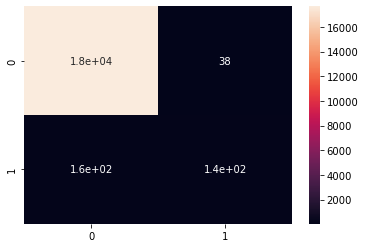

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

I have used LogisticRegression which in theory is a good machine learning model when we have linear data, binary class. In our dataset, the independent variable has only two classes "0" or "1" .The results is 99%. Accuracy . Thi is a very high score.  

### Second Machine learning Model

"DecisionTreeClassifier, a decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret". (Datacamp team, 2022)

In [38]:
from sklearn.tree import DecisionTreeClassifier      
from sklearn import metrics                           
from sklearn import tree

In [39]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17702
           1       0.57      0.48      0.52       298

    accuracy                           0.99     18000
   macro avg       0.78      0.74      0.76     18000
weighted avg       0.98      0.99      0.98     18000



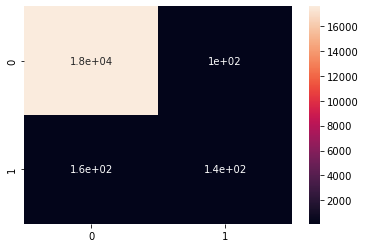

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict =clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In this case our Machine learning model has performed very well, showing 99% accuracy on predections. 

## 8- Curse of Dimensionality

What I understand about this topic is that our data will increase exponentially depending on the number of classes that we have in our dependable variable , as we will need more features known as dimensions to be able to train our model and predict with an acceptable percentange.
And this is a problem, since the more features we have the more difficult is for the algorithm to perform well, hence the margin of error will increase and increase. This does not occur on low dimensions data set, where we only have two or ten dimensions.

## Conclusions

It does not matter how big or small the dataset are, we need to have a good understanding of it, otherwise we will not be a ble to analyse it well.

Data cleaning is probably the most important step in data preparation and it really takes time but it is totally worthy.

Filling up missing values is not just imputing data to fill a space in our data, we can definetely have very differente result if we dont use the best option to fill missing values.

Knowing the concept of the funtions we use in our coding is essential, otherwise we do not know what we are doing and why.

Big dataset can be as easy to analyse as small data sets if we use the right tools to do so.

There is no only one way to achive the same result in data analysis, some ways can be faster or more efficient but as long as you get same results, it is still ok. 

**Trucks have much more failures on component not related to APS than the ones related to APS, based on this, the company should invest on fixing those trucks with APS failure because in the short future this trucks will break down and fixing them will be much more expensive in the future than now** 


**Findings**

Not all machine learning models will perform equally in the same dataset. Some of them will show better accuaracy than others.

Data can be transformed and coded so we can work with it in a better way.

Big dataset with many features can be reduced using PCA to get the principal components. 


## Reference list

Introduction to Machine Learning with Python A Guide for Data Scientists (2017) by Andreas C. Müller and Sarah Guido

Introduction to Machine Learning Third Edition Ethem Alpaydın The MIT Press Cambridge, Massachusetts London, England, 2014.

Scikit-learn developers (2022). scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/ [Accessed Oct 31st. 2022].

matplotlib team 2022, matplotlib.org, available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

pandas 2022 via NumFOCUS, Inc, Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
https://www.w3schools.com/python/pandas/ref_df_describe.asp[Accessed Oct 21st. 2022].
pandas 2022, Available at https://pandas.pydata.org/[Accessed Nov 1st. 2022].
formpl team , 2022, formpl.us, available at: https://www.formpl.us/blog/categorical-numerical-data
library development 2022 available at :https://librarydevelopment.group.shef.ac.uk/referencing/harvard.html#:~:text=Harvard%20style%20referencing%20is%20an,or%20bibliography%20at%20the%20end.[Accessed Oct 29th. 2022].

Stack Exchange Inc 2022,Stackoverflow, Available at: https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values[Accessed Oct 25th. 2022].

Kebola team 20022, Keboola.com , available at: https://www.keboola.com/blog/pca-machine-learning#:~:text=Principal%20Component%20Analysis%20(PCA)%20is,%2Dnoising%2C%20and%20plenty%20more.[Accessed Nov 04th. 2022].

Educative team , 2022, Educative.io, available at :https://www.educative.io/answers/what-is-the-traintestsplit-function-in-sklearn[Accessed Nov 04th. 2022]

Scikit developers ,2022, scikit-learn.org  Available at : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html[Accessed Nov 03rd. 2022]


Datacamp, 2022, datacamp.com, available at: https://www.datacamp.com/tutorial/understanding-logistic-regression-python[Accessed Nov 04th. 2022]
